In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split


# Reemplaza 'ruta/al/archivo/df_merged.csv' con la ubicación real de tu archivo CSV
archivo_EDA_csv = 'df_merged.csv'

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(archivo_EDA_csv)

# Elimina el índice adicional ('Unnamed: 0') y restablece el índice
df = df.drop(columns=['Unnamed: 0']).reset_index(drop=True)

# Configura la opción para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(df.head(10)) # Imprime las primeras 5 filas del df



   genres      title release_date  price  item_id_x developer    user_id  item_name  playtime_forever                               funny      posted  item_id_y  recommend  sentiment_analysis
0  Action  Half-Life   1998-11-08   9.99         70     Valve   70302272  Half-Life              21.0    2 people found this review funny  2014-11-11     332800       True                   1
1  Action  Half-Life   1998-11-08   9.99         70     Valve  101773440  Half-Life             787.0    1 person found this review funny  2014-06-23     222880       True                   2
2  Action  Half-Life   1998-11-08   9.99         70     Valve   66333856  Half-Life            1062.0    7 people found this review funny  2014-11-23     113204      False                   1
3  Action  Half-Life   1998-11-08   9.99         70     Valve  134671008  Half-Life             265.0    1 person found this review funny  2014-06-26     242760       True                   2
4  Action  Half-Life   1998-11-08   9.99

In [2]:
print(df.describe())

# Count #(Recuento): Esta fila muestra el número de observaciones válidas en cada columna. 
# hay 1,726 observaciones válidas para todas las columnas numéricas.

# Mean (Media): La media es el valor promedio de los datos en cada columna. 
# la media de la columna "price" es aproximadamente 12.22, lo que significa que, en promedio, el precio es alrededor de 12.22.

# Std (Desviación Estándar): La desviación estándar mide la dispersión de los datos.
# Cuanto mayor sea la desviación estándar, mayor será la variabilidad de los datos. 
# la desviación estándar de "price" es aproximadamente 5.99, lo que indica que los precios varían significativamente alrededor de la media.

# Min (Mínimo): Este es el valor mínimo en cada columna. 
# Por ejemplo, el valor mínimo de "price" es 0.99, lo que indica el precio mínimo observado en estos datos.

# 25% (Cuartil 25% o Primer Cuartil): El 25% (primer cuartil) es el valor que separa el 25% inferior de los datos. 
# Por ejemplo, el 25% de los precios son iguales o inferiores a 9.99.

# 50% (Cuartil 50% o Mediana): La mediana es el valor que separa el 50% inferior de los datos. 
# la mediana de "price" es 9.99, lo que significa que el 50% de los precios son iguales o inferiores a 9.99.

# 75% (Cuartil 75% o Tercer Cuartil): El 75% (tercer cuartil) es el valor que separa el 75% inferior de los datos.
# Por ejemplo, el 75% de los precios son iguales o inferiores a 14.99.

# Max (Máximo): Este es el valor máximo en cada columna. 
# Por ejemplo, el valor máximo de "price" es 160.91, que es el precio máximo observado en tus datos.


             price      item_id_x       user_id  playtime_forever      item_id_y  sentiment_analysis
count  1726.000000    1726.000000  1.726000e+03       1726.000000    1726.000000         1726.000000
mean     12.217648    5465.799537  1.026890e+08       5133.754925  178025.068366            1.243337
std       5.993606   23478.005323  1.423627e+08      14181.712590  134645.500721            0.835377
min       0.990000      10.000000 -1.866590e+09          0.000000      20.000000            0.000000
25%       9.990000     220.000000  8.511727e+07         98.000000    8930.000000            0.000000
50%       9.990000     320.000000  1.046013e+08        672.500000  221100.000000            1.500000
75%      14.990000    4000.000000  1.213684e+08       3026.500000  289650.000000            2.000000
max     160.910000  319510.000000  1.873410e+09     205987.000000  423880.000000            2.000000


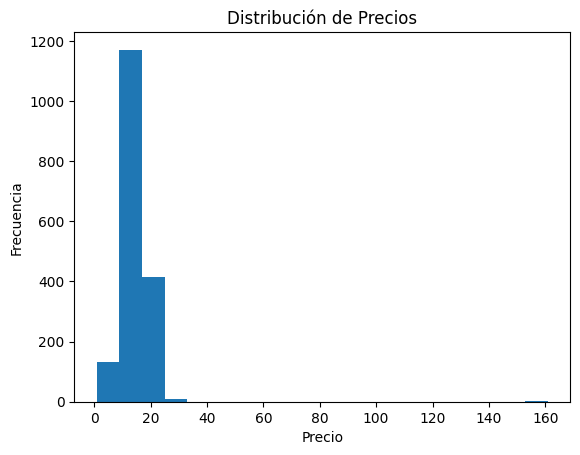

In [3]:
plt.hist(df['price'], bins=20)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')
plt.show()

# Se observan n rangos de precios que van desde el valor mínimo (0.99) hasta el valor máximo (160.91). 
# Distribución sesgada hacia la derecha, se puede visualizar mas cantidad de precios hacia la izquierda lo que quiere decir 
# que los precios de los juegos de steam oscilan mas entre los 0.99 y 30 dolares aproximadamente.
# La moda es el punto mas alto en el histograma y es el valor o el precio mas frecuente en estos datos 
# esta entre los 15 y 20 dolares aproximadamente.
# La anchura de las barras y la extensión del histograma en el eje X dan una idea de la variabilidad en los precios.
# Se evidencia que la dispersion mas marcada esta entre los 0.99 y 30 dolares por la anchura de las barras.
# En cuanto a los valores atipicos, se evidencia un precio alejado de la moda cerca a los 160 dolares.  


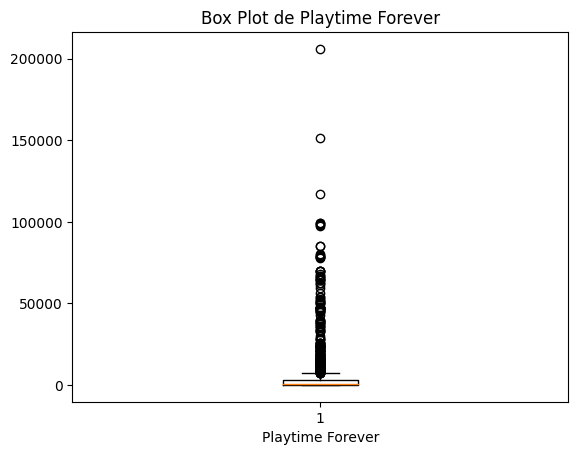

In [7]:
plt.boxplot(df['playtime_forever'])
plt.xlabel('Playtime Forever')
plt.title('Box Plot de Playtime Forever')
plt.show()

# La línea en el centro de la caja muestra la mediana de "Playtime Forever". 
# La mediana es el valor que separa el 50% inferior del 50% superior de los datos. 
# Vemos la mediana más cerca de un extremo de la caja, la distribución es asimétrica.
# Se observan valores atipicos como puntos individuales alejados de la media y esto quiere decir que hay usuarios que han jugado
#  muchas mas horas en relacion con los demas.
# Vemos que la caja en el grafico es bastante amplia lo que indica que hay una variabilidad significativa en los valores de "Playtime Forever".

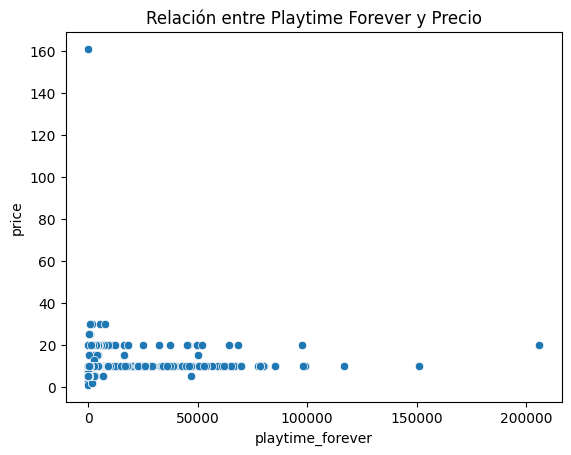

In [8]:
sns.scatterplot(x='playtime_forever', y='price', data=df)
plt.title('Relación entre Playtime Forever y Precio')
plt.show()

# Podemos ver que la mayoría de los juegos están en el extremo inferior del precio y tienen una amplia variabilidad en el tiempo de juego.
# En los valores atipicos podemos ver que entre mas costoso sea el juego menos horas de juego tienen es una relacion inversamente proporcional.

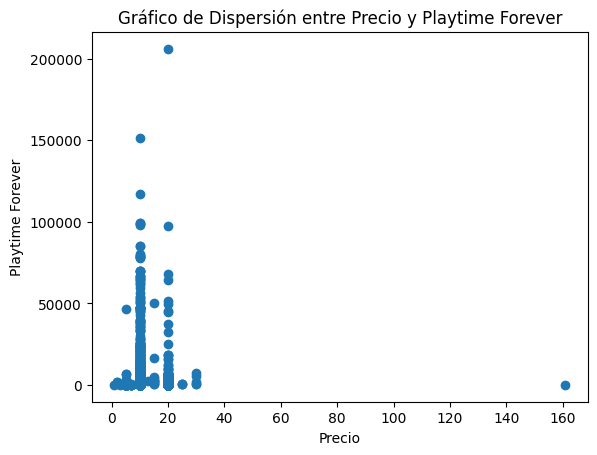

In [9]:
plt.scatter(df['price'], df['playtime_forever'])
plt.xlabel('Precio')
plt.ylabel('Playtime Forever')
plt.title('Gráfico de Dispersión entre Precio y Playtime Forever')
plt.show()

# Se observa una tendencia general en la relación entre el precio y el tiempo de juego.
# Los puntos tienden a formar una tendencia  en una dirección,  indica que al aumentar el precio las horas de juego son menores.

In [10]:
# Encuentra el juego con la mayor cantidad de horas jugadas y su precio
juego_mas_jugado = df[df['playtime_forever'] == df['playtime_forever'].max()]
nombre_juego_mas_jugado = juego_mas_jugado['title'].values[0]
precio_juego_mas_jugado = juego_mas_jugado['price'].values[0]
horas_jugadas_juego_mas_jugado = juego_mas_jugado['playtime_forever'].values[0]

# Imprime el nombre del juego, su precio y las horas jugadas
print(f'El juego con más horas jugadas es "{nombre_juego_mas_jugado}"')
print(f'Precio: ${precio_juego_mas_jugado}')
print(f'Horas Jugadas: {horas_jugadas_juego_mas_jugado} horas')

# Se evidencia la relacion y coherencia entre el grafico anterior y esta consulta, el precio no se aleja de la media pero las horas jugadas 
# nos muestran un valor atipico por la cantidad de horas jugadas en comparacion con otros juegos.

El juego con más horas jugadas es "Counter-Strike: Source"
Precio: $19.99
Horas Jugadas: 205987.0 horas


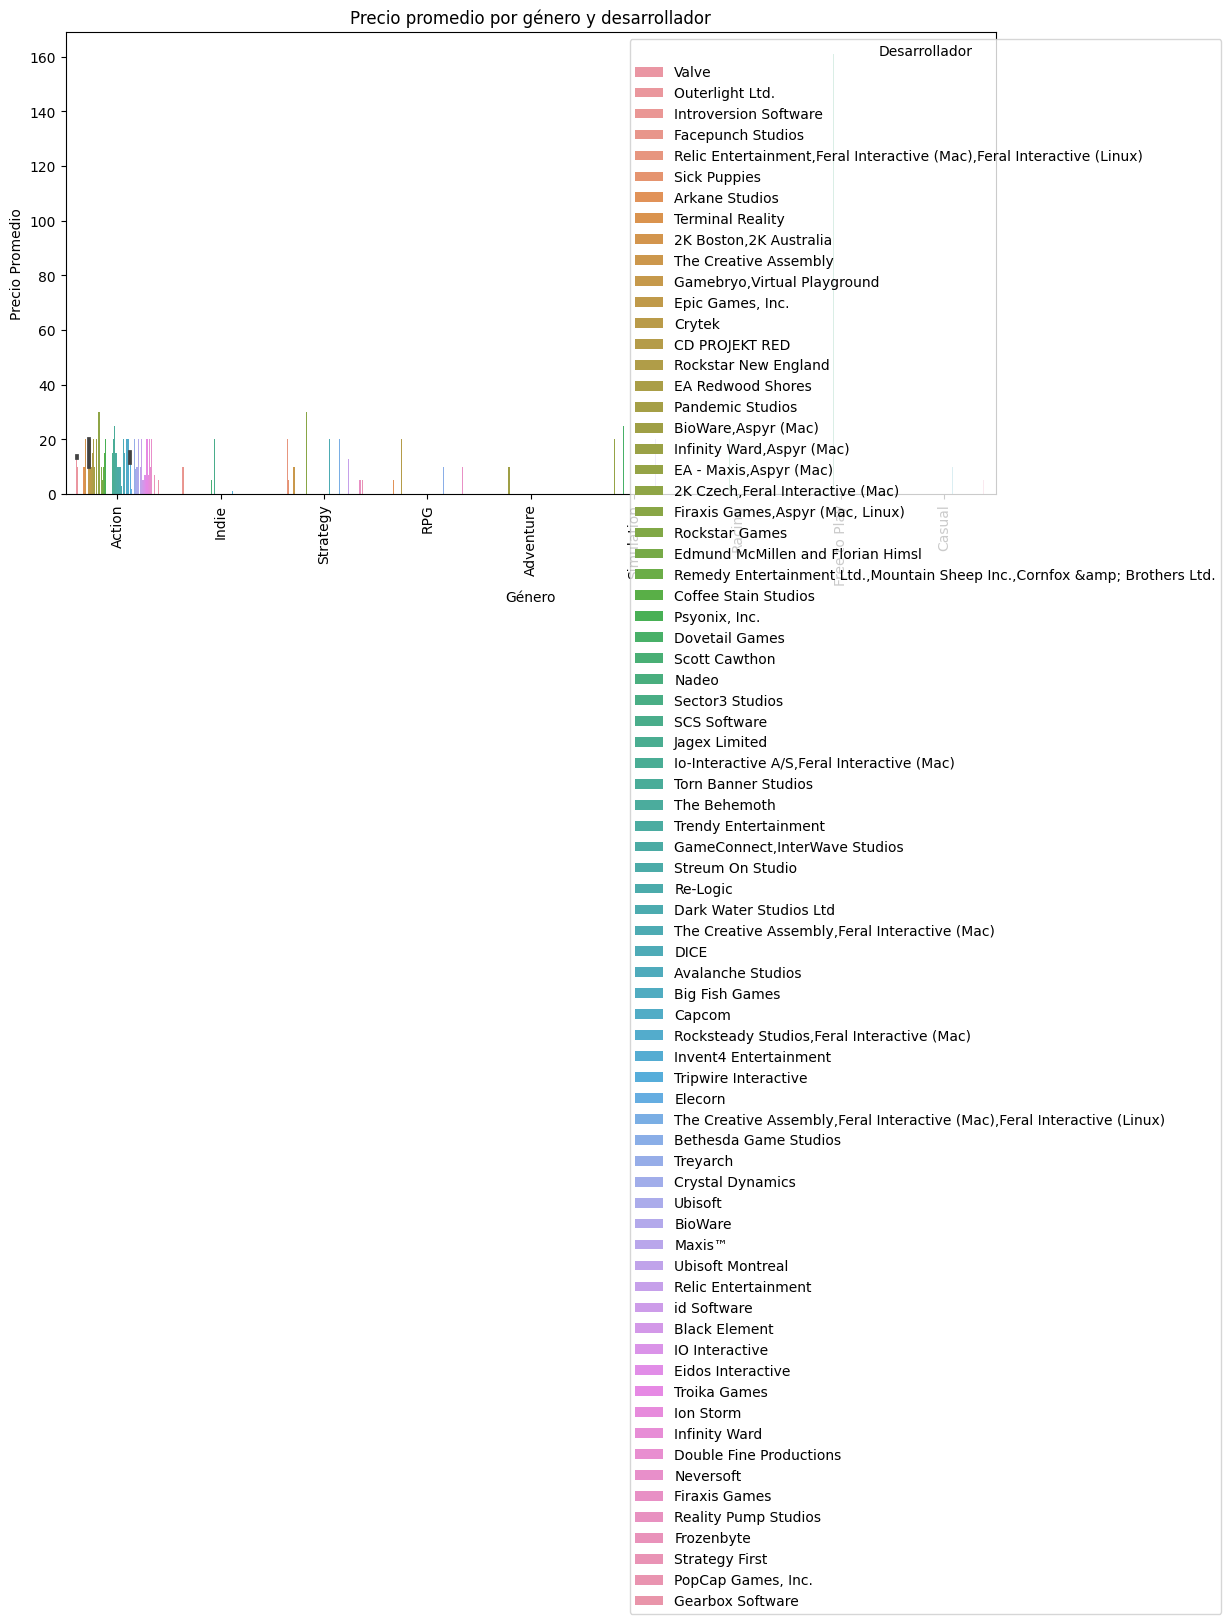

In [11]:
# Crea un gráfico de barras apiladas para ver la relación entre género, precio y desarrollador
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura

# Utiliza seaborn para crear el gráfico de barras apiladas
sns.barplot(x='genres', y='price', hue='developer', data=df)
plt.title('Precio promedio por género y desarrollador')
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para mayor legibilidad
plt.xlabel('Género')
plt.ylabel('Precio Promedio')
plt.legend(title='Desarrollador', loc='upper right', bbox_to_anchor=(1.25, 1))  # Agrega una leyenda
plt.show()

# Se puede ver cómo varía el precio promedio de los juegos según el género y el desarrollador. 
# Por ejemplo, podemos comparar el precio promedio de los juegos de un género específico entre diferentes desarrolladores.
# Es el caso para el genero de "action", vemos que agrupa el precio promedio por la mayoria de desarrolladores y 
# podria ser una variable para incrementar el volumen de juegos de este genero reduciendo un poco su valor para ser mas competitivo.
# En los juegos de estrategia los desarrolladores son menores seguramente por el nivel mas bajo de demanda en el mercado.

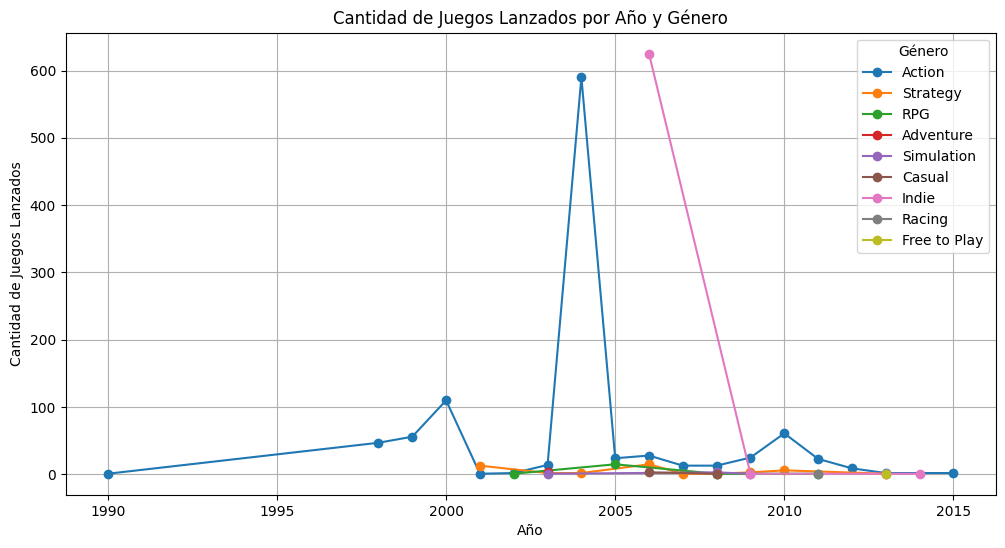

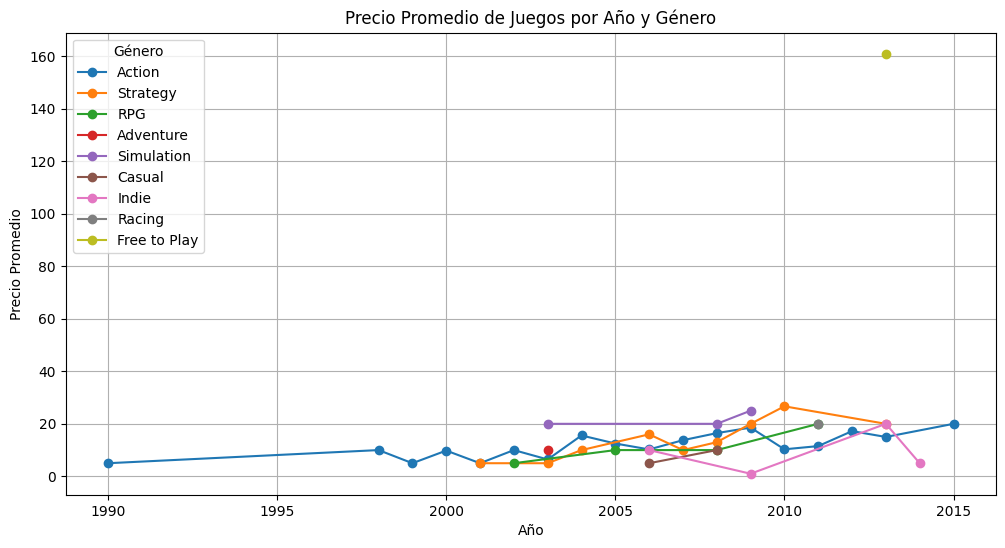

In [17]:

# Convierte la columna 'release_date' al tipo de dato 'datetime'
df['release_date'] = pd.to_datetime(df['release_date'])

# Extrae el año de la columna 'release_date' y crea una nueva columna 'year'
df['year'] = df['release_date'].dt.year

# Agrupa los datos por año, género y calcula el precio promedio y la cantidad de juegos
agregaciones = {
    'price': 'mean',
    'title': 'count'
}
df_agrupado = df.groupby(['year', 'genres']).agg(agregaciones).reset_index()

# Crear un gráfico de líneas para analizar la cantidad de juegos lanzados por año
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura

# Itera a través de cada género y grafica líneas para la cantidad de juegos lanzados
for genero in df_agrupado['genres'].unique():
    datos_genero = df_agrupado[df_agrupado['genres'] == genero]
    plt.plot(datos_genero['year'], datos_genero['title'], label=genero, marker='o')

plt.title('Cantidad de Juegos Lanzados por Año y Género')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos Lanzados')
plt.legend(title='Género')
plt.grid(True)

plt.show()

# Crear un segundo gráfico de líneas para analizar el precio promedio por año
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura

# Itera a través de cada género y grafica líneas para el precio promedio
for genero in df_agrupado['genres'].unique():
    datos_genero = df_agrupado[df_agrupado['genres'] == genero]
    plt.plot(datos_genero['year'], datos_genero['price'], label=genero, marker='o')

plt.title('Precio Promedio de Juegos por Año y Género')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.legend(title='Género')
plt.grid(True)

# Se hace un análisis de datos y se crean dos gráficos de líneas para visualizar 
# la evolución de dos métricas a lo largo de los años, desglosado por género. 

# Se evidencia que a partir de 1990 hasta el año 2004 el genero de accion estuvo siempre liderando la cantidad de juegos
# Lanzados por año a partir de ese año nivelo el numero de lanzamientos con los otros generos hasta el año 2015.
# Podemos observar que los juegos de estrategia y simulacion son los que manejan un precio promedio mas elevado entre los años 2003 a 2010.



Se intenta implementar el modelo de machine learning pero no arroja resultados y mas adelante se mejora

In [16]:
# Cargar tus datos desde un archivo CSV
archivo_EDA_csv = pd.read_csv("df_merged.csv")  # Reemplaza "ruta_de_tu_archivo.csv" con la ubicación de tu archivo CSV

# Crear una matriz de preferencias user-item
user_item_matrix = archivo_EDA_csv.pivot_table(index='user_id', columns='item_id_x', values='recommend', fill_value=0)

# Calcular la similitud entre usuarios (usando cosine similarity)
user_similarity = cosine_similarity(user_item_matrix)

# Crear un DataFrame con la matriz de similitud de usuarios
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Definir una función para obtener las recomendaciones para un usuario dado
def obtener_recomendaciones(id_usuario, num_recomendaciones=5):
    if id_usuario not in user_item_matrix.index:
        return []  # Usuario no encontrado en los datos

    # Calcular la puntuación de similitud entre el usuario y otros usuarios
    similaridades_usuario = user_similarity_df.loc[id_usuario]

    # Ordenar los usuarios por similitud en orden descendente
    usuarios_similares = similaridades_usuario.sort_values(ascending=False)

    # Filtrar al usuario actual (ya que es 100% similar consigo mismo)
    usuarios_similares = usuarios_similares.drop(id_usuario)

    # Obtener los juegos que el usuario actual no ha jugado
    juegos_jugados_por_usuario = user_item_matrix.loc[id_usuario]
    juegos_no_jugados = juegos_jugados_por_usuario[juegos_jugados_por_usuario == 0]

    # Calcular las recomendaciones
    recomendaciones = []
    for usuario_similar_id, similitud in usuarios_similares.items():
        juegos_usuario_similar = user_item_matrix.loc[usuario_similar_id]
        juegos_usuario_similar = juegos_usuario_similar[juegos_usuario_similar > 0]
        for juego_id, rating in juegos_usuario_similar.items():
            if juego_id in juegos_no_jugados:
                recomendaciones.append((juego_id, similitud * rating))

    # Ordenar las recomendaciones por puntaje
    recomendaciones.sort(key=lambda x: x[1], reverse=True)

    # Tomar las mejores recomendaciones
    top_recomendaciones = recomendaciones[:num_recomendaciones]

    return top_recomendaciones

# Ejemplo de cómo obtener recomendaciones para un usuario
id_usuario_ejemplo =  70302272  # Reemplaza con el ID de usuario deseado
recomendaciones = obtener_recomendaciones(id_usuario_ejemplo)
print("Recomendaciones para el usuario {}: ".format(id_usuario_ejemplo))
for i, (juego_id, puntaje) in enumerate(recomendaciones, 1):
    print("{}. Juego ID: {}, Puntaje: {:.2f}".format(i, juego_id, puntaje))

Recomendaciones para el usuario 70302272: 
1. Juego ID: 4000, Puntaje: 0.00
2. Juego ID: 240, Puntaje: 0.00
3. Juego ID: 240, Puntaje: 0.00
4. Juego ID: 4700, Puntaje: 0.00
5. Juego ID: 50, Puntaje: 0.00


# Como funciona este modelo de aprendizaje automático para recomendaciones:

Carga de datos: Comienza cargando los datos desde un archivo CSV llamado "df_merged.csv". Estos datos contienen información sobre juegos, usuarios y sus interacciones, como calificaciones y preferencias.

División de datos: Luego, divide los datos en dos conjuntos: uno de entrenamiento y otro de prueba. Esto se hace para evaluar qué tan bien funciona el modelo para hacer recomendaciones. El conjunto de entrenamiento se utiliza para entrenar el modelo, y el conjunto de prueba se utiliza para evaluar su rendimiento.

Creación de matriz usuario-ítem: A continuación, crea una matriz que relaciona a los usuarios con los ítems (en este caso, juegos). Cada celda de la matriz representa la preferencia de un usuario por un juego. En este caso, la preferencia se mide con la columna "recommend", que indica si el usuario recomienda el juego (1) o no (0).

Cálculo de similitud entre usuarios: El modelo calcula la similitud entre los usuarios. En otras palabras, compara las preferencias de un usuario con las de otros usuarios para encontrar usuarios similares. Esto se hace utilizando la similitud del coseno, una medida que compara la dirección y la magnitud de las preferencias de los usuarios.

Generación de recomendaciones: Luego, se define una función para obtener las recomendaciones para un usuario específico. Esta función encuentra a los usuarios más similares al usuario de interés, identifica los juegos que el usuario aún no ha calificado y calcula puntuaciones de recomendación para esos juegos. Las puntuaciones se basan en las preferencias de los usuarios similares.

Presentación de recomendaciones: Finalmente, se llama a la función de recomendación para un usuario específico (se proporciona un ID de usuario) y se obtienen las mejores recomendaciones (en este caso, las 5 mejores). Estas recomendaciones se presentan en forma de nombres de juegos.

En resumen, el modelo utiliza el comportamiento pasado de los usuarios (recomendaciones de juegos) y la similitud entre los usuarios para hacer recomendaciones personalizadas. Estas recomendaciones se basan en lo que les ha gustado a otros usuarios con preferencias similares.

En esta parte del codigo user_id = ****  pueden cambiar el usuario y arroja la lista con los 5 juegos recomendados.

In [15]:
# Cargar los datos desde tu DataFrame
df = pd.read_csv("df_merged.csv") 

# División de datos en conjuntos de entrenamiento y prueba
# Dividimos los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Creamos una matriz usuario-ítem utilizando la columna 'recommend' como medida de preferencia
user_item_matrix = pd.pivot_table(train_data, index='user_id', columns='item_id_x', values='recommend', fill_value=0)

# Calcular la similitud entre usuarios
user_similarity = cosine_similarity(user_item_matrix)

# Definimos la función para obtener recomendaciones
def get_recommendations(user_id, user_similarity, user_item_matrix, top_n=5):
    # Encuentra los usuarios más similares
    user_index = user_item_matrix.index.get_loc(user_id)
    similar_users = user_similarity[user_index]
    
    # Encuentra los ítems que el usuario aún no ha calificado
    unrated_items = user_item_matrix.iloc[user_index][user_item_matrix.iloc[user_index] == 0].index
    
    # Calcular las puntuaciones de recomendación para los ítems no calificados
    recommendation_scores = user_item_matrix.iloc[similar_users].mean()
    
    # Filtrar los ítems ya calificados por el usuario
    recommendation_scores = recommendation_scores.drop(user_item_matrix.iloc[user_index][user_item_matrix.iloc[user_index] > 0].index)
    
    # Ordenar las recomendaciones por puntuación
    top_recommendations = recommendation_scores.sort_values(ascending=False).head(top_n)
    
    return top_recommendations.index

# Llamamos a la función para obtener las recomendaciones para un usuario específico
user_id = 81018576    # Reemplaza con el usuario de tu elección
recommendations = get_recommendations(user_id, user_similarity, user_item_matrix)
# Crear un diccionario que mapee los item_id_x a los nombres de los juegos
item_id_to_name = df[['item_id_x', 'item_name']].drop_duplicates().set_index('item_id_x')['item_name']

# Obtener los nombres de los juegos recomendados
recommended_game_names = item_id_to_name[recommendations].tolist()

print("Recomendaciones para el usuario", user_id, ":", recommended_game_names)




Recomendaciones para el usuario 81018576 : ["Garry's Mod", 'Half-Life 2', 'Counter-Strike', 'Resident Evil 5 / Biohazard 5', 'The Witcher 2: Assassins of Kings Enhanced Edition']


Análisis Exploratorio de Datos EDA y Conclusiones:

El análisis exploratorio de datos realizado en el conjunto de datos proporciona información valiosa sobre los juegos disponibles en la plataforma Steam. A continuación, se presentan algunas conclusiones derivadas de este análisis:

Distribución de Precios:

Los precios de los juegos en Steam varían desde un mínimo de $0.99 hasta un máximo de $160.91.

La distribución de precios está sesgada hacia la derecha, con la mayoría de los juegos con precios más bajos (aproximadamente entre $0.99 y $30). 
La moda de precios se encuentra en el rango de $15 a $20.

Se observan algunos valores atípicos con precios significativamente altos, aunque la mayoría de los juegos se ubican en el rango de precios más bajos.

Playtime Forever (Tiempo de Juego):

El tiempo de juego varía ampliamente, con valores desde 0 horas hasta más de 200,000 horas.

Se identifican valores atípicos en el tiempo de juego, indicando que hay usuarios que han invertido muchas más horas que el promedio en algunos juegos.

Relación entre Precio y Tiempo de Juego:

Existe una tendencia general que muestra que, a medida que aumenta el precio de un juego, disminuye el tiempo de juego promedio. Esto sugiere que los juegos más caros tienden a tener menos horas de juego promedio.

Juego con Más Horas Jugadas:

El juego "Counter-Strike: Source" se destaca como el juego con más horas jugadas, con un total de 205,987 horas. Su precio es de $19.99.
Esto refuerza la idea de que los juegos con precios promedio no necesariamente tienen menos tiempo de juego y que hay excepciones significativas.

Análisis de Género, Precio y Desarrollador:

Se exploró la relación entre el género de un juego, su precio promedio y el desarrollador.
Se observa que, para algunos géneros como "Action," varios desarrolladores contribuyen a la oferta de juegos, mientras que para géneros como "Strategy," la variedad de desarrolladores es menor. Esto podría sugerir que algunos géneros son más populares y competitivos.
El análisis de esta relación puede ayudar a los desarrolladores a tomar decisiones sobre la fijación de precios y el enfoque en géneros específicos.

Evolución de los Juegos a lo Largo del Tiempo:

Se analizó la cantidad de juegos lanzados por año, desglosado por género.
Entre 1990 y 2004, el género "Action" lideró en términos de cantidad de juegos lanzados por año. Posteriormente, otros géneros alcanzaron un número similar de lanzamientos.
Se observa que los géneros de "Strategy" y "Simulation" tienden a tener un precio promedio más alto entre los años 2003 y 2010, lo que podría indicar una mayor inversión en juegos de estos géneros.
    
En resumen, el análisis exploratorio de datos proporciona una visión detallada de los juegos en la plataforma Steam. Ofrece información valiosa para los desarrolladores y la comunidad de jugadores, incluyendo tendencias de precios, tiempo de juego y preferencias por género. Los desarrolladores pueden utilizar estos conocimientos para tomar decisiones informadas sobre la fijación de precios y la creación de juegos que se alineen con las preferencias de los jugadores en diferentes géneros y a lo largo del tiempo.